Student Name: Ze Chen

# Task 2  - Telcom Customer Churn Analysis

data source: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd #read xls
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer =  pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col = 0)
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Target Variable: ChurnWhether the customer churned or not (Yes or No)

**Feature Engineering**

Covert variable 'TotalCharges' to numeric, change variable 'SeniorCitizen' to object

In [3]:
customer['TotalCharges'] = pd.to_numeric(customer.TotalCharges,
                                         errors='coerce')

customer['SeniorCitizen'] = customer['SeniorCitizen'].astype('object')

In [4]:
customer['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## 2.1 
Visualize the univariate distribution of each continuous feature, and the distribution of the
target.

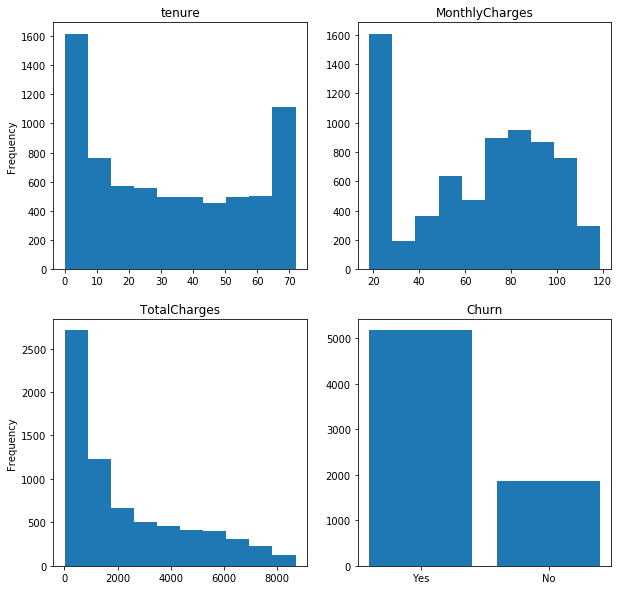

In [5]:
fig, ax = plt.subplots(2, 2 ,figsize=(10,10))

ax[0,0].hist(customer['tenure'])
ax[0,0].set_title('tenure')
ax[0,0].set_ylabel('Frequency')

ax[0,1].hist(customer['MonthlyCharges'])
ax[0,1].set_title('MonthlyCharges')

ax[1,0].hist(customer['TotalCharges'])
ax[1,0].set_title('TotalCharges')
ax[1,0].set_ylabel('Frequency')

ax[1,1].bar(['Yes','No'], [5174,1869])
ax[1,1].set_title('Churn')

plt.show()

## 2.2

Split data into training and test set. Build a pipeline for dealing with categorical variables. Evaluate Logistic Regression, linear support vector machines and nearest centroids usingcross-validation. Compare results. Scaling the continuous features withStandardScaler and compare the results

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline 
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC

In [7]:
X = customer.iloc[:, :-1]
y = customer['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Find Categorical Variables

In [8]:
categorical = X_train.dtypes == object

### Scenario 1: without scaling continuous variable

Make a column tranformer to do One Hot Encoding and impute missing values.

In [9]:
preprocess_OHE_impute = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'), categorical),
        (SimpleImputer(strategy='median'), ~categorical))

In [10]:
def columntransform_pipe(preprocess, model):
    """
    Return two dictionary contains cross validation score for models after 
    building a pipeline called 'preprocess'.
    preprocess: a ColumnTransformer constructed before
    model: a list of models that will be tested for, such as LinearRegression().
    """
    model_dict_median = {}
    model_dict_mean={}
    R2_list_median = []
    for item in model:
        pipe = make_pipeline(preprocess, item)
        pipe.fit(X_train, y_train)
        score = cross_val_score(pipe, X_train, y_train)
        score_median = np.round(np.median(score),5)
        score_mean = np.round(np.mean(score),5)
        model_dict_median[item] = score_median
        model_dict_mean[item] = score_mean
        R2_list_median.append(score_median)
    return model_dict_median, model_dict_mean, R2_list_median

def tidy_output(model_list, R2_list):
    R2_dict = {}
    i=0
    for item in model_list:
        R2_dict[item]=R2_list[i]
        i+=1
    return R2_dict

In [11]:
model_list = [LogisticRegression(), LinearSVC(), NearestCentroid()]
dict_median, dict_mean, R2_list_median = columntransform_pipe(preprocess_OHE_impute,
                                              model_list)
dict_median

{LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False): 0.80057,
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0): 0.59205,
 NearestCentroid(metric='euclidean', shrink_threshold=None): 0.5233}

Print R square for each model with default parameters.

In [12]:
model_name = ['LogisticRegression', 'LinearSVC', 'NearestCentroid']
tidy_output(model_name, R2_list_median)

{'LogisticRegression': 0.80057,
 'LinearSVC': 0.59205,
 'NearestCentroid': 0.5233}


### Scenario 2: with scaling continuous variable

In [13]:
cont_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', StandardScaler())])
preprocess_onehot_impute_sd = ColumnTransformer(
    [("cat", OneHotEncoder(handle_unknown='ignore'),categorical),
     ("norm", cont_transformer,  ~categorical)])  

In [14]:
model_list = [LogisticRegression(), LinearSVC(),NearestCentroid()]
dict_median, dict_mean,R2_list_median_2 = columntransform_pipe(
    preprocess_onehot_impute_sd, model_list)
dict_median

{LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False): 0.80227,
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0): 0.80341,
 NearestCentroid(metric='euclidean', shrink_threshold=None): 0.74489}

In [15]:
model_name = ['LogisticRegression', 'LinearSVC', 'NearestCentroid']
tidy_output(model_name, R2_list_median_2)

{'LogisticRegression': 0.80227,
 'LinearSVC': 0.80341,
 'NearestCentroid': 0.74489}

#### Explanation:
Before scaling,NearestCentroid's score is significantly lower than Logistic Regression and Linear SVM's scores.

After scaling continuous variables, the score of Nearest Centroid improves significantly, increased from 0.523 to 0.745. Linear SVC's score also improves a bit, improved to around 0.8. The scores of Logistic Regression doesn't change significantly. Thus, we may conclude that scaling is very important for Nearest Centroid while not very important to Logistic regression.

## 2.3 
Tune the parameters using GridSearchCV. Do the results improve?
Visualize the performance as function of the parameters for all three models

In [16]:
from sklearn.model_selection import GridSearchCV

### Tune parameters for logistic regression

In [17]:
#preprocess_onehot_impute_sd is a column transformer constructed in 2.2, did OHE on categorical and standardize continuous variable
#preprocess_onehot_impute_sd.fit_transform(X_train)
logistic_pipe = make_pipeline(preprocess_onehot_impute_sd, 
                              LogisticRegression())
param_grid = {'logisticregression__C': 
              [0.001, 0.01, 0.1, 1, 10, 100]} 
#careful: there are multiple steps in pipeline, so use logisticregression__C
logistic_grid = GridSearchCV(logistic_pipe, param_grid)
logistic_grid.fit(X_train, y_train)
logparam_2_5 = logistic_grid.best_params_
print(logistic_grid.best_params_)

{'logisticregression__C': 0.01}


In [18]:
print(logistic_grid.best_score_)

0.8053767512305945


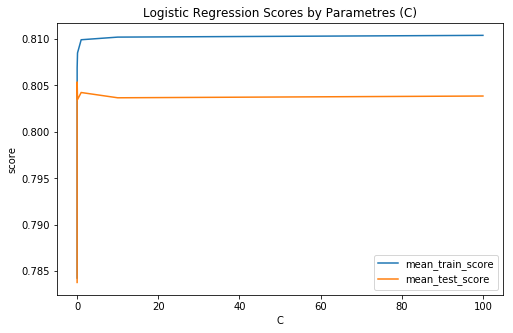

In [19]:
#get lists of mean_train_score and mean_test_score
param_list = [0.001, 0.01, 0.1, 1, 10, 100]
logistic_mean_train_score = logistic_grid.cv_results_[
    'mean_train_score']
logistic_mean_test_score = logistic_grid.cv_results_[
    'mean_test_score']

#Plot graph
fig= plt.figure(figsize=(8,5))
plt.plot(param_list, logistic_mean_train_score, 
         label = 'mean_train_score')
plt.plot(param_list, logistic_mean_test_score, 
         label = 'mean_test_score')
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.title('Logistic Regression Scores by Parametres (C)')
plt.show()

### Tune parameter for Linear SVM

In [20]:
SVC_pipe = make_pipeline(preprocess_onehot_impute_sd, 
                              LinearSVC())
param_grid = {'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100]} 
#C: Penalty parameter C of the error term.
SVC_grid = GridSearchCV(SVC_pipe, param_grid)
SVC_grid.fit(X_train, y_train)
svcpapram_2_5 = SVC_grid.best_params_
print(SVC_grid.best_params_)

{'linearsvc__C': 0.001}


In [21]:
print(SVC_grid.best_score_)

0.8044301400984476


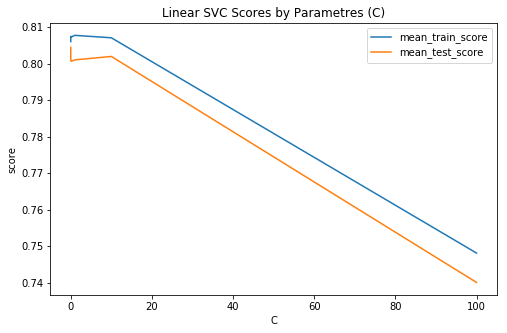

In [22]:
#get lists of mean_train_score and mean_test_score
param_list = [0.001, 0.01, 0.1, 1, 10, 100]
svc_mean_train_score = SVC_grid.cv_results_['mean_train_score']
svc_mean_test_score = SVC_grid.cv_results_['mean_test_score']

#Plot graph
fig= plt.figure(figsize=(8,5))
plt.plot(param_list, svc_mean_train_score, label = 'mean_train_score')
plt.plot(param_list, svc_mean_test_score, label = 'mean_test_score')
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.title('Linear SVC Scores by Parametres (C)')
plt.show()

### Tune parameter for Nearest Centroid

In [23]:
nearestcentroid_pipe = make_pipeline(preprocess_onehot_impute_sd, 
                              NearestCentroid())
param_grid = {'nearestcentroid__shrink_threshold': 
              [0.001, 0.01, 0.1, 1, 10, 100]} 
nearestcentroid_grid = GridSearchCV(nearestcentroid_pipe, param_grid)
nearestcentroid_grid.fit(X_train, y_train)
print(nearestcentroid_grid.best_params_)

{'nearestcentroid__shrink_threshold': 0.001}


In [24]:
print(nearestcentroid_grid.best_score_)

0.7396819386595986


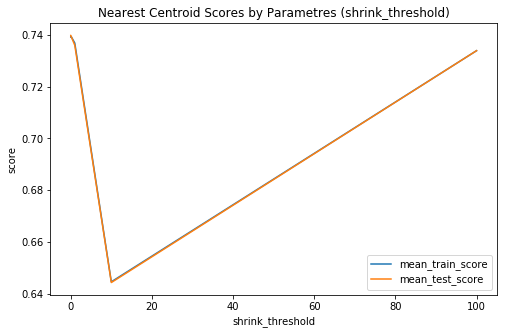

In [25]:
#get lists of mean_train_score and mean_test_score
param_list = [0.001, 0.01, 0.1, 1, 10, 100]
nc_mean_train_score = nearestcentroid_grid.cv_results_['mean_train_score']
nc_mean_test_score = nearestcentroid_grid.cv_results_['mean_test_score']

#Plot graph
fig= plt.figure(figsize=(8,5))
plt.plot(param_list, nc_mean_train_score, label = 'mean_train_score')
plt.plot(param_list, nc_mean_test_score, label = 'mean_test_score')
plt.legend()
plt.xlabel('shrink_threshold')
plt.ylabel('score')
plt.title('Nearest Centroid Scores by Parametres (shrink_threshold)')
plt.show()

For the Nearest Centroid model, mean_train_score and mean_test_score overlap.

### Explanation: 
Compare with default parameters in previous section(section 2.2), R square score doesn't impove significantly after tuning parameters using GridSearchCV.

## 2.4
Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the
parameters that are found change? Do they change if you change the random seed of the
shuffling? Or if you change the random state of the split into training and test data?

In [26]:
from sklearn.model_selection import KFold

### With Shuffling

#### Logistic Regression with shuffling

In [27]:
logistic_pipe = make_pipeline(preprocess_onehot_impute_sd, 
                              LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]} #careful: there are multiple steps in pipeline, so use logisticregression__C
logistic_grid = GridSearchCV(logistic_pipe, param_grid,
                             cv=KFold(shuffle=True))
logistic_grid.fit(X_train, y_train)
print(logistic_grid.best_params_)

{'logisticregression__C': 100}


In [28]:
print(logistic_grid.best_score_)

0.8040514956455888


#### Linear SVC with shuffling

In [29]:
SVC_pipe = make_pipeline(preprocess_onehot_impute_sd, 
                              LinearSVC())
param_grid = {'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100]} 
#C: Penalty parameter C of the error term.
SVC_grid = GridSearchCV(SVC_pipe, param_grid, cv=KFold(shuffle=True))
SVC_grid.fit(X_train, y_train)
print(SVC_grid.best_params_)

{'linearsvc__C': 0.001}


In [30]:
print(SVC_grid.best_score_)

0.8044301400984476


#### Nearest Centroid with shuffling

In [31]:
nearestcentroid_pipe = make_pipeline(preprocess_onehot_impute_sd, 
                              NearestCentroid())
param_grid = {'nearestcentroid__shrink_threshold': 
              [0.001, 0.01, 0.1, 1, 10, 100]} 
nearestcentroid_grid = GridSearchCV(nearestcentroid_pipe, param_grid, 
                                    cv=KFold(shuffle=True))
nearestcentroid_grid.fit(X_train, y_train)
print(nearestcentroid_grid.best_params_)

{'nearestcentroid__shrink_threshold': 0.001}


In [32]:
print(nearestcentroid_grid.best_score_)

0.7394926164331692


### Change random seed of shuffing

#### logistic regression (random state = 666)

In [33]:
logistic_pipe_2 = make_pipeline(preprocess_onehot_impute_sd, 
                              LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]} 
logistic_grid_2 = GridSearchCV(logistic_pipe_2, param_grid,
                               cv=KFold(shuffle=True, random_state = 666))
logistic_grid_2.fit(X_train, y_train)
print(logistic_grid_2.best_params_)

{'logisticregression__C': 10}


In [34]:
print(logistic_grid_2.best_score_)

0.8074592957213177


#### Linear SVM (random state = 666)

In [35]:
SVC_pipe_2 = make_pipeline(preprocess_onehot_impute_sd, 
                              LinearSVC())
param_grid = {'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100]} 
#C: Penalty parameter C of the error term.
SVC_grid_2 = GridSearchCV(SVC_pipe_2, param_grid, 
                          cv=KFold(shuffle=True, random_state = 666))
SVC_grid_2.fit(X_train, y_train)
print(SVC_grid_2.best_params_)

{'linearsvc__C': 0.001}


In [36]:
print(SVC_grid_2.best_score_)

0.8046194623248769


#### Nearest Centroid (random state = 666)

In [37]:
nearestcentroid_pipe_2 = make_pipeline(preprocess_onehot_impute_sd, 
                              NearestCentroid())
param_grid = {'nearestcentroid__shrink_threshold': [0.001, 0.01, 0.1, 1, 10, 100]} 
nearestcentroid_grid_2 = GridSearchCV(nearestcentroid_pipe_2, param_grid, 
                                      cv=KFold(shuffle=True, random_state = 666))
nearestcentroid_grid_2.fit(X_train, y_train)
print(nearestcentroid_grid_2.best_params_)

{'nearestcentroid__shrink_threshold': 0.001}


In [38]:
print(nearestcentroid_grid_2.best_score_)

0.7400605831124574


### Change random state of test train split

In [39]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, random_state=666)

#### Logistic Regression

In [40]:
logistic_pipe_3 = make_pipeline(preprocess_onehot_impute_sd, 
                              LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]} 
logistic_grid_3 = GridSearchCV(logistic_pipe_3, param_grid,cv=KFold(shuffle=True))
logistic_grid_3.fit(X_train_new, y_train_new)
print(logistic_grid_3.best_params_)

{'logisticregression__C': 0.01}


In [41]:
print(logistic_grid_3.best_score_)

0.8072699734948883


#### Linear SVM

In [42]:
SVC_pipe_3 = make_pipeline(preprocess_onehot_impute_sd, 
                              LinearSVC())
param_grid = {'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100]} 
#C: Penalty parameter C of the error term.
SVC_grid_3 = GridSearchCV(SVC_pipe_3, param_grid, cv=KFold(shuffle=True))
SVC_grid_3.fit(X_train_new, y_train_new)
print(SVC_grid_3.best_params_)

{'linearsvc__C': 10}


In [43]:
print(SVC_grid_3.best_score_)

0.8072699734948883


#### Nearest Centroid

In [44]:
nearestcentroid_pipe_3 = make_pipeline(preprocess_onehot_impute_sd, 
                              NearestCentroid())
param_grid = {'nearestcentroid__shrink_threshold': 
              [0.001, 0.01, 0.1, 1, 10, 100]} 
nearestcentroid_grid_3 = GridSearchCV(nearestcentroid_pipe_3, param_grid, 
                                      cv=KFold(shuffle=True))
nearestcentroid_grid_3.fit(X_train_new, y_train_new)
print(nearestcentroid_grid_3.best_params_)

{'nearestcentroid__shrink_threshold': 100}


In [45]:
print(nearestcentroid_grid_3.best_score_)

0.7389246497538811


### Explanation:

For all three models, parameters may change when shuffling strategy is used during cross validation, when random seed of shuffling is changed, or when random state of test train split is changed. However, R square scores do not change significantly and are approximately same when parameteres change.

## 2.5 
Visualize the coefficients for LogisticRegression and Linear Support Vector Machines using
hyper-parameters that performed well in the grid-search.

Use parameter selected in section 2.3

In [46]:
logparam = logparam_2_5['logisticregression__C']
print(logparam)

0.01


In [47]:
svcparam = svcpapram_2_5['linearsvc__C']
print(svcparam)


0.001


### Plot coefficients for logistic regression

In [48]:
logstic_pipe = Pipeline(steps=[('ohe_sd', preprocess_onehot_impute_sd),
                           ('logistic', LogisticRegression(C = logparam))])
logstic_pipe.fit(X_train,y_train)
logistic_coef = logstic_pipe.named_steps['logistic'].coef_

Text(0.5, 1.0, 'Coefficients of Logistic Regression')

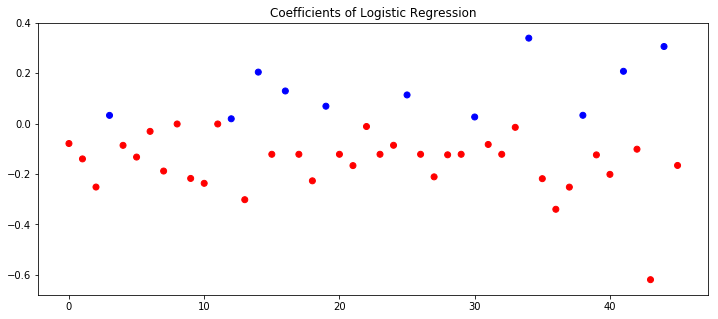

In [49]:
fig= plt.figure(figsize=(12,5))
plt.scatter(range(logistic_coef.shape[1]), logistic_coef,
            c=np.sign(logistic_coef), cmap="bwr_r")
plt.title('Coefficients of Logistic Regression')

First, in order to match coefficients with feature name, get a list called 'all_features_lst' that contain all feature names in the order which corresponds to coefficient order.

In [50]:
cont_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', StandardScaler())])
preprocess_onehot_impute_sd = ColumnTransformer(
    [("cat", OneHotEncoder(handle_unknown='ignore'),categorical),
     ("norm", cont_transformer,  ~categorical)]) 
preprocess_onehot_impute_sd.fit_transform(X_train)
features = preprocess_onehot_impute_sd.named_transformers_['cat'].get_feature_names()

cat_lst = features.tolist()

continuous_lst = ['tenure','MonthlyCharges', 'TotalCharges']

def combine_twolist(list1, list2):
    lst = []
    for item in list1:
        lst.append(item)
    for item in list2:
        lst.append(item)
    return lst

all_features_lst = combine_twolist(cat_lst,continuous_lst)

In [51]:
def match_feature_coef(feature_list:list, coef_list: list):
    """
    Return a dictionary that mathes feature name with coefficients: key are features, values are coefficients
    feature_list: list of feature names
    coef_list: list of coefficients
    """
    i=0
    coef_dict = {}
    for item in feature_list:
        coef_dict[item]=coef_list[i]
        i+=1
    return coef_dict


def select_important_features(coef_dict:dict, upper:float, lower:float):
    """
    Return a tuple: key are selected features, value are coefficients.
    upper: float, the selected features should have coeffcients higher than upper
    lower: float, the selected features should have coeffcients less than lower
    """
    select_feature_dict = {}
    for key, value in coef_dict.items():
        if value >= upper:
            select_feature_dict[key] = value
        elif value <= lower:
            select_feature_dict[key] = value
    sort_select_feature_dict = sorted(select_feature_dict.items(), key=lambda x: x[1])
    return sort_select_feature_dict
    
    
def prepare_two_lists(sort_select_feature_dict):
    """
    Return a feature list and a coefficient list.
    Input is a list containg tuples(size=2)
    """
    feature_list = []
    coef_list = []
    for item in sort_select_feature_dict:
        feature_list.append(item[0])
        coef_list.append(item[1])
    return feature_list, coef_list

#### Select Important Features for Logistic Regressions

In [52]:
logistic_coef_lst = logistic_coef.tolist()[0]
logistic_coef_dict = match_feature_coef(all_features_lst,logistic_coef_lst)
logistic_sort_select_feature_dict = select_important_features(logistic_coef_dict, 0.2,-0.2)

Text(0, 0.5, 'Features')

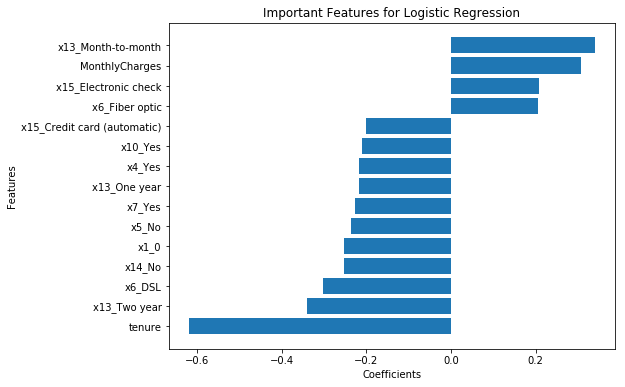

In [53]:
feature_list_logistic, coef_list_logistic = prepare_two_lists(logistic_sort_select_feature_dict)
fig= plt.figure(figsize=(8,6))
plt.barh(feature_list_logistic,coef_list_logistic)
plt.title('Important Features for Logistic Regression')
plt.xlabel('Coefficients')
plt.ylabel('Features')

### Plot coefficients for linear SVM

In [54]:
svc_pipe = Pipeline(steps=[('ohe_sd', preprocess_onehot_impute_sd),
                           ('svc', LinearSVC(C = svcparam))])
svc_pipe.fit(X_train,y_train)
svc_coef = svc_pipe.named_steps['svc'].coef_

Text(0.5, 1.0, 'Coefficients of Linear SVC')

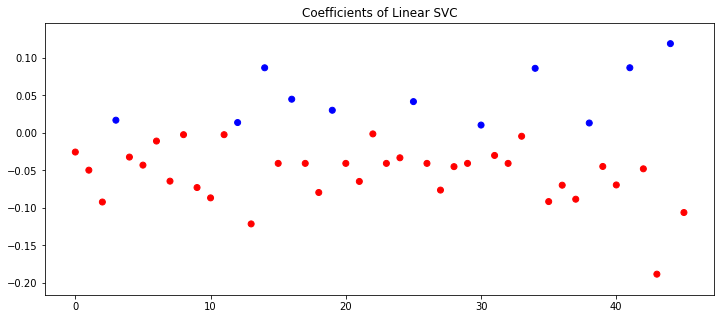

In [55]:
fig= plt.figure(figsize=(12,5))
plt.scatter(range(svc_coef.shape[1]), svc_coef,
            c=np.sign(svc_coef), cmap="bwr_r")
plt.title('Coefficients of Linear SVC')

#### Select Important Features for Linear SVM

In [56]:
svc_coef_lst = svc_coef.tolist()[0]
svc_coef_dict = match_feature_coef(all_features_lst,svc_coef_lst)
svc_sort_select_feature_dict = select_important_features(svc_coef_dict, 0.08,-0.08)

Text(0, 0.5, 'Features')

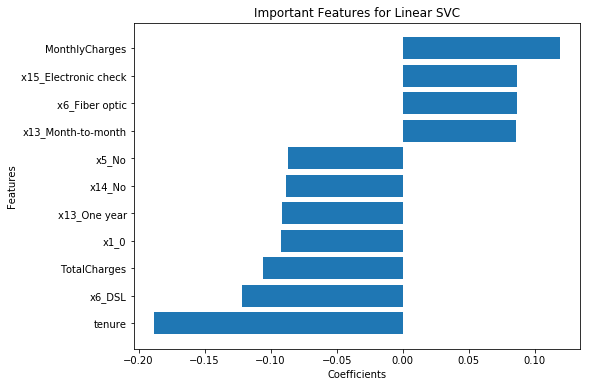

In [57]:
feature_list_svc, coef_list_svc = prepare_two_lists(svc_sort_select_feature_dict)
fig= plt.figure(figsize=(8,6))
plt.barh(feature_list_svc,coef_list_svc)
plt.title('Important Features for Linear SVC')
plt.xlabel('Coefficients')
plt.ylabel('Features')

### Explanation:
Both Logistic Regression and Linear SVM shows that tenure is an important feature to determine churn. Also, monthly charges, x6_DSL(categorical variable 'Internet Service'), x13_month_to_month(categorical variable 'contract') are also important.